In [8]:
import pandas as pd
import numpy as np

In [9]:
dataFrame = pd.read_csv("zoo.csv")

In [10]:
dataFrame.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
dataFrame.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [12]:
dataFrame["animal_name"]

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal_name, Length: 101, dtype: object

In [13]:
dataFrame=dataFrame.drop("animal_name",axis=1)

In [14]:
dataFrame.corr()["class_type"].sort_values()

backbone     -0.828845
milk         -0.723683
tail         -0.631830
hair         -0.562384
catsize      -0.521030
breathes     -0.519308
toothed      -0.471527
feathers     -0.197520
domestic     -0.181043
airborne      0.022677
predator      0.061179
fins          0.099430
legs          0.131693
venomous      0.321476
aquatic       0.326639
eggs          0.661825
class_type    1.000000
Name: class_type, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:xlabel='class_type', ylabel='count'>

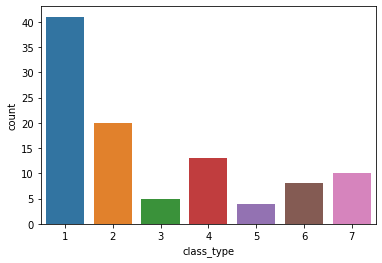

In [16]:
sbn.countplot(x="class_type",data = dataFrame)

#SINIFLANDIRMA MODELİ

In [17]:
y=dataFrame["class_type"].values
x=dataFrame.drop("class_type",axis=1).values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
x_train.shape

(80, 16)

In [22]:
model = Sequential()

model.add(Dense(16,activation="relu")) 
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu")) 

model.add(Dense(1)) ######

model.compile(optimizer="adam",loss="mse")

In [23]:
model.fit(x=x_train,y=y_train,epochs=22,validation_data=(x_test,y_test)) ###epochs

Train on 80 samples, validate on 21 samples
Epoch 1/22
80/80 [==============================] - 0s 6ms/sample - loss: 9.7785 - val_loss: 10.2172
Epoch 2/22
80/80 [==============================] - 0s 112us/sample - loss: 9.3766 - val_loss: 9.8292
Epoch 3/22
80/80 [==============================] - 0s 112us/sample - loss: 8.9745 - val_loss: 9.4561
Epoch 4/22
80/80 [==============================] - 0s 150us/sample - loss: 8.6007 - val_loss: 9.0792
Epoch 5/22
80/80 [==============================] - 0s 112us/sample - loss: 8.2227 - val_loss: 8.7102
Epoch 6/22
80/80 [==============================] - 0s 125us/sample - loss: 7.9144 - val_loss: 8.3535
Epoch 7/22
80/80 [==============================] - 0s 137us/sample - loss: 7.6080 - val_loss: 8.0200
Epoch 8/22
80/80 [==============================] - 0s 137us/sample - loss: 7.2895 - val_loss: 7.7066
Epoch 9/22
80/80 [==============================] - 0s 125us/sample - loss: 7.0619 - val_loss: 7.3997
Epoch 10/22
80/80 [====================

In [24]:
model.history.history

{'loss': [9.77849178314209,
  9.376557350158691,
  8.974524307250977,
  8.60065975189209,
  8.222711753845214,
  7.914414024353027,
  7.607989311218262,
  7.289480590820313,
  7.06185302734375,
  6.847641277313232,
  6.596511936187744,
  6.417825412750244,
  6.2367753982543945,
  6.073846530914307,
  5.915425586700439,
  5.779848670959472,
  5.666410255432129,
  5.5502935409545895,
  5.42481632232666,
  5.34827070236206,
  5.224120140075684,
  5.127310752868652],
 'val_loss': [10.217161178588867,
  9.829216957092285,
  9.456140518188477,
  9.079151153564453,
  8.71015739440918,
  8.353490829467773,
  8.019997596740723,
  7.706602573394775,
  7.399680137634277,
  7.110315322875977,
  6.850858211517334,
  6.605968475341797,
  6.372828960418701,
  6.159124374389648,
  5.960475444793701,
  5.776484489440918,
  5.5966057777404785,
  5.424259662628174,
  5.265037536621094,
  5.09340763092041,
  4.946225643157959,
  4.807150840759277]}

In [25]:
modelKaybi1 = pd.DataFrame(model.history.history)

<AxesSubplot:>

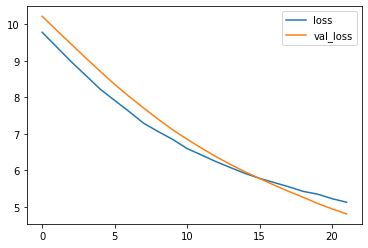

In [26]:
modelKaybi1.plot()

In [27]:
tahminler=model.predict(x_test).round()

In [28]:
tahminler

array([[1.],
       [3.],
       [2.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [3.],
       [2.]], dtype=float32)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.86      0.75      0.80         8
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2

    accuracy                           0.29        21
   macro avg       0.14      0.12      0.13        21
weighted avg       0.33      0.29      0.30        21



C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
yeni = [[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]] #Ayiyi test ettik ama doğru sonuç bulamadık

In [32]:
model.predict(yeni)

array([[2.5910342]], dtype=float32)

In [33]:
yeni2 = [[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0]] # Balık

In [80]:
model.predict(yeni2)

array([[4.0201836]], dtype=float32)

In [ ]:
#Pek doğru sonuçlar olmadığı için Earlystopping uyguladık.

# Erken Durma(Earlystopping)

In [55]:
model = Sequential()

model.add(Dense(16,activation="relu")) 
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu")) 

model.add(Dense(1)) ######

model.compile(optimizer="adam",loss="mse")

In [56]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10) 

In [57]:
model.fit(x=x_train, y=y_train, epochs = 300, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])

Train on 80 samples, validate on 21 samples
Epoch 1/300
80/80 [==============================] - 0s 4ms/sample - loss: 21.1607 - val_loss: 20.0477
Epoch 2/300
80/80 [==============================] - 0s 113us/sample - loss: 20.1224 - val_loss: 19.1143
Epoch 3/300
80/80 [==============================] - 0s 100us/sample - loss: 19.1682 - val_loss: 18.2691
Epoch 4/300
80/80 [==============================] - 0s 125us/sample - loss: 18.3494 - val_loss: 17.5067
Epoch 5/300
80/80 [==============================] - 0s 125us/sample - loss: 17.6356 - val_loss: 16.8408
Epoch 6/300
80/80 [==============================] - 0s 100us/sample - loss: 16.9149 - val_loss: 16.2578
Epoch 7/300
80/80 [==============================] - 0s 125us/sample - loss: 16.3307 - val_loss: 15.7337
Epoch 8/300
80/80 [==============================] - 0s 125us/sample - loss: 15.7556 - val_loss: 15.2490
Epoch 9/300
80/80 [==============================] - 0s 125us/sample - loss: 15.2172 - val_loss: 14.7862
Epoch 10/300


80/80 [==============================] - 0s 100us/sample - loss: 2.0614 - val_loss: 2.0963
Epoch 80/300
80/80 [==============================] - 0s 112us/sample - loss: 1.9814 - val_loss: 2.0430
Epoch 81/300
80/80 [==============================] - 0s 137us/sample - loss: 1.9001 - val_loss: 1.9896
Epoch 82/300
80/80 [==============================] - 0s 112us/sample - loss: 1.8316 - val_loss: 1.9356
Epoch 83/300
80/80 [==============================] - 0s 112us/sample - loss: 1.7623 - val_loss: 1.8826
Epoch 84/300
80/80 [==============================] - 0s 112us/sample - loss: 1.6919 - val_loss: 1.8348
Epoch 85/300
80/80 [==============================] - 0s 125us/sample - loss: 1.6298 - val_loss: 1.7875
Epoch 86/300
80/80 [==============================] - 0s 87us/sample - loss: 1.5686 - val_loss: 1.7406
Epoch 87/300
80/80 [==============================] - 0s 112us/sample - loss: 1.5112 - val_loss: 1.6963
Epoch 88/300
80/80 [==============================] - 0s 125us/sample - loss: 

80/80 [==============================] - 0s 125us/sample - loss: 0.2358 - val_loss: 0.5669
Epoch 158/300
80/80 [==============================] - 0s 125us/sample - loss: 0.2302 - val_loss: 0.5609
Epoch 159/300
80/80 [==============================] - 0s 138us/sample - loss: 0.2265 - val_loss: 0.5509
Epoch 160/300
80/80 [==============================] - 0s 137us/sample - loss: 0.2221 - val_loss: 0.5435
Epoch 161/300
80/80 [==============================] - 0s 125us/sample - loss: 0.2175 - val_loss: 0.5394
Epoch 162/300
80/80 [==============================] - 0s 138us/sample - loss: 0.2132 - val_loss: 0.5333
Epoch 163/300
80/80 [==============================] - 0s 125us/sample - loss: 0.2088 - val_loss: 0.5276
Epoch 164/300
80/80 [==============================] - 0s 125us/sample - loss: 0.2049 - val_loss: 0.5244
Epoch 165/300
80/80 [==============================] - 0s 137us/sample - loss: 0.2006 - val_loss: 0.5212
Epoch 166/300
80/80 [==============================] - 0s 112us/sampl

Epoch 235/300
80/80 [==============================] - 0s 100us/sample - loss: 0.0623 - val_loss: 0.2114
Epoch 236/300
80/80 [==============================] - 0s 112us/sample - loss: 0.0616 - val_loss: 0.2120
Epoch 237/300
80/80 [==============================] - 0s 125us/sample - loss: 0.0612 - val_loss: 0.2121
Epoch 238/300
80/80 [==============================] - 0s 100us/sample - loss: 0.0603 - val_loss: 0.2105
Epoch 239/300
80/80 [==============================] - 0s 100us/sample - loss: 0.0598 - val_loss: 0.2084
Epoch 240/300
80/80 [==============================] - 0s 125us/sample - loss: 0.0592 - val_loss: 0.2066
Epoch 241/300
80/80 [==============================] - 0s 112us/sample - loss: 0.0587 - val_loss: 0.2051
Epoch 242/300
80/80 [==============================] - 0s 125us/sample - loss: 0.0581 - val_loss: 0.2027
Epoch 243/300
80/80 [==============================] - 0s 137us/sample - loss: 0.0575 - val_loss: 0.1997
Epoch 244/300
80/80 [==============================] - 

In [58]:
modelKaybi2 = pd.DataFrame(model.history.history)

<AxesSubplot:>

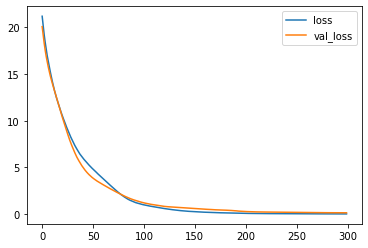

In [59]:
modelKaybi2.plot()

# TAHMİN ETME
#Burada kendimiz özelliklerini giriyoruz ve  yapay zeka ile memelimi,balık mı,böcek mi türünü tahmin ediyor.


In [60]:
# 1-Memeli 2-Kuş 3-Sürüngen 4-Balık 5-Amfibi 6-Böcek 7-Omurgasız 

In [61]:
dataClass = pd.read_csv("class.csv")

In [62]:
dataClass

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [63]:
yeniBalik = [[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0]] #Balik

In [64]:
model.predict(yeniBalik).round()

array([[4.]], dtype=float32)

In [65]:
yeniAyi = [[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]] # Ayinin

In [66]:
model.predict(yeniAyi).round()

array([[1.]], dtype=float32)

In [67]:
dataFrame

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [68]:
yeniSol = [[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0]] #Solucan

In [69]:
model.predict(yeniSol).round()

array([[7.]], dtype=float32)

In [70]:
yeniBöcek = [[1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0]] #Böcek

In [71]:
model.predict(yeniBöcek ).round() 

array([[6.]], dtype=float32)

In [72]:
yeniSemender = [[0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0]]

In [73]:
model.predict(yeniSemender).round() 

array([[4.]], dtype=float32)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, tahminler) #sapmamız

1.6666666666666667

In [75]:
yeniKedi = [[1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1]] # Tamamen kendimiz kedi özelliklerini girdik ve memeli olduğunu bulduk(Doğru)

In [76]:
model.predict(yeniKedi).round() 

array([[1.]], dtype=float32)

In [77]:
#Modelimizi Test Ettik Şimdi kayıt ederek istediğimiz zaman tahminlerde bulunabiliriz

In [78]:
from tensorflow.keras.models import load_model


In [79]:
model.save("AnimalsClassification.h5")

In [ ]:
#sonradanCagirilanModel = load_model("AnimalsClassification.h5") #sonradan çağırmak için